<a href="https://colab.research.google.com/github/lhs7091/PythonTensorExam/blob/master/exam_11/cnn_08_mnist_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("./mist_data", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input placeholders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # image 28*28*1(black/white), input layer
            X_image = tf.reshape(self.X, [-1,28,28,1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_image, filters=32, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
            # Pooling Layer 1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], padding='SAME', strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=self.training)

            # Convolutional Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], padding='SAME', strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, training=self.training)

            # Convolutional Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2,2], padding='SAME', strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1,4*4*128])
            dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

            # Logits(no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y), name='cost')
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

    def predict(self, x_test, training=False):
        #return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training:training})
        return self.sess.run(tf.argmax(self.logits,1), feed_dict={self.X: x_test, self.training:training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y:y_test, self.training:training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X:x_data, self.Y:y_data, self.training:training})


# initalize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost = c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print("Learning Finished!!!!")

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mist_data/t10k-images-idx3-ubyte.gz
Extracting ./mist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use ker

Label:  [1]
Prediction:  [1]


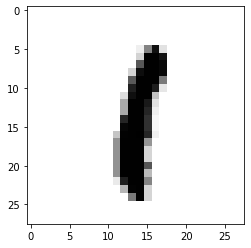

In [2]:
import random
import matplotlib.pyplot as plt
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", m1.predict(mnist.test.images[r:r + 1]))
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap="Greys", interpolation="nearest",)
plt.show()